In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
plotdir <- '/home/kpettie/code/github/plotting'
source(file.path(plotdir,"plotting.R"))

fontdir <- '/cashew/shared_data/fonts'
extrafont::font_import(path=fontdir, prompt=FALSE)
extrafont::choose_font('Arial')

Scanning ttf files in /cashew/shared_data/fonts ...

Extracting .afm files from .ttf files...

/cashew/shared_data/fonts/ArialMT.ttf
 : ArialMT already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /opt/modules/pkgs/R/4.1.0/lib/R/library/extrafontdb/metrics



[1] "Arial"

In [4]:
pops <- c('YRI','LWK','GWD','ESN','TSI','IBS','FIN','CEU')
outdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs'

In [14]:
popco <- popPlotColors(pops=pops) %>% 
    filter(replicate=='rep1') 
popco

population,hex,sample,replicate
<chr>,<chr>,<chr>,<chr>
YRI,#2A3D88,YRI_rep1,rep1
LWK,#4263AE,LWK_rep1,rep1
GWD,#6CA7DA,GWD_rep1,rep1
ESN,#7FCDF3,ESN_rep1,rep1
TSI,#9A4C28,TSI_rep1,rep1
IBS,#D67F30,IBS_rep1,rep1
FIN,#E1AB31,FIN_rep1,rep1
CEU,#EAD78D,CEU_rep1,rep1


# ATAC

## run-merged rmdup

In [6]:
# cf <- '/cashew/users/kade/nextflow/selection_1000G/mapping/120721output/counts/PE_read_counts.txt'
# cf <- '/home/kpettie/nf_selection/mapping/run2/230721output/counts/maf0.05mac0/PE_read_counts.txt'
# cf <- '/home/kpettie/nf_selection/mapping/run2/300721mapqfirst/counts/maf0.05mac0/PE_read_counts.txt'

# cf <- '/cashew/users/kade/nextflow/selection_1000G/mapping/merge_runs/060821output/counts/PE_read_counts.txt'
c <- read_tsv(cf) %>% 
    separate(samp,c('pop','rep'),sep='_',convert=TRUE)
c 

ERROR: Error: '/cashew/users/kade/nextflow/selection_1000G/mapping/merge_runs/060821output/counts/PE_read_counts.txt' does not exist.


In [ ]:
popco <- tribble(
    ~pop,  ~hex,
    'CEU', '#EAD78D',
    'FIN', '#E1AB31',
    'IBS', '#D67F30',
    'TSI', '#9A4C28',
    'ASW', '#BEE1F8',
    'ESN', '#7FCDF3',
    'GWD', '#6CA7DA',
    'LWK', '#4263AE',
    'YRI', '#2A3D88',
    'CHB', '#7AC09F'
) %>% 
arrange(desc(row_number()))

cw <- c %>% 
    group_by(pop,map_step) %>% 
    summarize(PE_reads = sum(PE_reads)) %>% 
    ungroup %>% 
    pivot_wider(names_from=map_step,
                values_from=PE_reads)

if (ncol(cw)<5) {
    mapcols <- c('merged','rmdup')
    varcols <- c('merged','rmdup')
} else if (mapqfirst){
    mapcols <- c('raw','trimmed','initial','mapq','rmdup','hornet')
    varcols <- c('no_var','var','kept_var')
    cw <- cw %>% 
        dplyr::rename(hornet=final)
} else {
    mapcols <- c('raw','trimmed','initial','rmdup','hornet','mapq')
    varcols <- c('no_var','var','kept_var')
    cw <- cw %>% 
        dplyr::rename(hornet=unmapq,
                      mapq=final)
}

cw <- cw %>%  
    dplyr::select(pop, all_of(mapcols), all_of(varcols))

cw <- cw %>% 
    mutate(pop = as_factor(pop),
           pop = fct_relevel(pop, popco$pop))
cw

In [ ]:
mappedp <- cw %>% 
    dplyr::rename(cmerged=merged) %>% 
    mutate(merged =100*(cmerged/cmerged),
           rmdup  =100*(rmdup/cmerged)) %>% 
    dplyr::select(pop,all_of(mapcols))

options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 200)

ggparcoord(cw,
    columns = mapcols,
    groupColumn=1,
    scale='globalminmax',
    order=match(mapcols, colnames(cw)),
    showPoints = TRUE, 
    alphaLines = 1
    ) + 
  theme_classic() +
  scale_color_manual(values = popco$hex) + 
  guides(color = guide_legend(reverse = TRUE)) + 
  labs(x = "Mapping step",
         y = "Paired-end reads",
       color='Population') + 
    theme(axis.text.x = element_text(size=20,angle=30,hjust=0.7,vjust=0.7,margin=margin(t=-0.5,unit='line')),
          axis.text.y = element_text(size=20),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_blank(),
          axis.title.y = element_text(size=22),
          legend.position = c(.85,.65),
          legend.title = element_text(size=22),
          legend.text = element_text(size=14),
          legend.key.size = unit(1.5, "line"),
          legend.background = element_rect(fill = "transparent",colour = NA),
          legend.box.background = element_rect(fill = "transparent",colour = NA),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(1,2,0,0),"line")) 

In [ ]:
# allp
# mappedp
# hornetp

options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 200)

ggparcoord(mappedp,
    columns = 2:ncol(mappedp),
    groupColumn=1,
    scale='globalminmax',
#     order=2:ncol(allp),
    showPoints = TRUE, 
    alphaLines = 1
    ) + 
  theme_classic() +
  scale_color_manual(values = popco$hex) + 
  guides(color = guide_legend(reverse = TRUE)) + 
  labs(x = "Mapping step",
         y = "% of mapped PE reads",
       color='Population') + 
    theme(axis.text.x = element_text(size=20,angle=30,hjust=0.7,vjust=0.7,margin=margin(t=-0.5,unit='line')),
          axis.text.y = element_text(size=20),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_blank(),
          axis.title.y = element_text(size=22),
          legend.position = c(.85,.65),
          legend.title = element_text(size=22),
          legend.text = element_text(size=14),
          legend.key.size = unit(1.5, "line"),
          legend.background = element_rect(fill = "transparent",colour = NA),
          legend.box.background = element_rect(fill = "transparent",colour = NA),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(1,2,0,0),"line")) 

In [ ]:
c %>% 
    dplyr::filter(map_step=='rmdup') %>% 
    mutate(pop = as_factor(pop),
           pop = fct_relevel(pop, popco$pop),
           rep = as_factor(rep),
           rep = fct_relevel(rep, c('rep2','rep1'))) %>% 
    ggplot(aes(x=pop,
               y=PE_reads,
               alpha=rep,
               fill=pop)) +
#     geom_point(size=3,
#                pch=21,
#                position=position_dodge(0.6),
#                show.legend=FALSE) + 
#     geom_segment(linetype='dashed',
#                  position=position_dodge(c(0.6,0.6)),
#                  aes(x=pop,
#                      xend=pop,
#                      y=0,
#                      yend=PE_reads)) + 
    geom_bar(stat="identity",
             width=0.5,
             position=position_dodge(0.6),
             show.legend=FALSE) + 
    scale_fill_manual(values=popco$hex) + 
    scale_color_manual(values=popco$hex) + 
    scale_alpha_manual(values=c(1,1)) + 
    coord_flip() +  
    labs(
        y = "Paired-end reads - filtered", 
        x = "Population") + 
    theme_classic() + 
    theme(axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=16),
          axis.title.x = element_text(size=22),
          axis.title.y = element_text(size=22),
          plot.margin = unit(c(0,0.5,0,0),"line")
         )

### ashley snps comparison

In [ ]:
library(readxl)

arf <- '/cashew/users/kade/nextflow/selection_1000G/supp_data/reads_snps_elife-39595-fig1-data1-v1.xlsx'
ar <- read_excel(arf)
ar

In [ ]:
ars <- rbind(ar %>% dplyr::select(c(1,4)),
             ar %>% dplyr::select(c(1,4))) %>% 
    dplyr::rename(PE_reads=2,
                  pop=Population) %>% 
    mutate(rep=c(rep('rep1',10), rep('rep2',10)),
           informative_reads='caQTL')
ars

In [ ]:
cm <- c %>% 
    dplyr::filter(map_step=='rmdup') %>% 
    mutate(informative_reads='diff-ATAC') %>% 
    dplyr::select(-c(map_step))
cm

In [ ]:
popcor <- rbind(popco,popco) %>% 
    mutate(rep=c(rep('rep1',10), rep('rep2',10)),
           sample=paste(pop,rep,sep='_')) %>% 
    arrange(rep,pop)
popcor

In [ ]:
acm <- rbind(ars,cm) %>% 
    pivot_wider(names_from=informative_reads,
                values_from=PE_reads) %>% 
    mutate(sample=paste(pop,rep,sep='_'),
           sample = as_factor(sample),
           sample = fct_relevel(sample, popcor$sample))
#     dplyr::select(sample,caQTL,`diff-ATAC`)
acm

In [ ]:
ggparcoord(acm,
    columns = c(3,4),
    groupColumn=5,
    scale='globalminmax',
#     order=match(mapcols, colnames(cw)),
    showPoints = TRUE, 
    alphaLines = 1
    ) + 
  theme_classic() +
  scale_color_manual(values = popcor$hex) + 
  guides(color = guide_legend(reverse = TRUE,ncol=2)) + 
  labs(x = "Analysis",
         y = "Paired-end reads",
       color='Population') + 
    theme(axis.text.x = element_text(size=20,angle=30,hjust=0.7,vjust=0.7,margin=margin(t=-0.5,unit='line')),
          axis.text.y = element_text(size=20),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_blank(),
          axis.title.y = element_text(size=22),
          legend.position = c(.99,.5),
          legend.title = element_text(size=12),
          legend.text = element_text(size=10),
          legend.key.size = unit(1.5, "line"),
          legend.background = element_rect(fill = "transparent",colour = NA),
          legend.box.background = element_rect(fill = "transparent",colour = NA),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(1,2,0,0),"line")) 

# HiChIP

## post-WASP reads

In [5]:
hccf <- '/home/kpettie/nf_selection/hichip/mapping/hicpro/separate_reps/results/counts/maf0.05mac0/PE_read_counts.txt'
hcc <- read_tsv(hccf) %>% 
    separate(sample,c('sample','chunk'),sep='\\.',convert=TRUE) %>% 
    separate(sample, c('population','replicate'), sep='_', convert=TRUE, remove=FALSE) %>% 
    group_by(population, sample, replicate, map_step) %>% 
    summarize(PE_reads = sum(PE_reads)) %>% 
    filter(population %in% pops)
hcc

Rows: 1315 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): sample, map_step
dbl (1): PE_reads

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'population', 'sample', 'replicate'. You
can override using the `.groups` argument.


population,sample,replicate,map_step,PE_reads
<chr>,<chr>,<chr>,<chr>,<dbl>
CEU,CEU_rep1,rep1,final,213140570
CEU,CEU_rep1,rep1,initial,258226440
CEU,CEU_rep1,rep1,kept_var,13800196
CEU,CEU_rep1,rep1,no_var,199340374
CEU,CEU_rep1,rep1,var,53394816
CEU,CEU_rep2,rep2,final,127905692
CEU,CEU_rep2,rep2,initial,157690035
CEU,CEU_rep2,rep2,kept_var,8071304
CEU,CEU_rep2,rep2,no_var,119834388


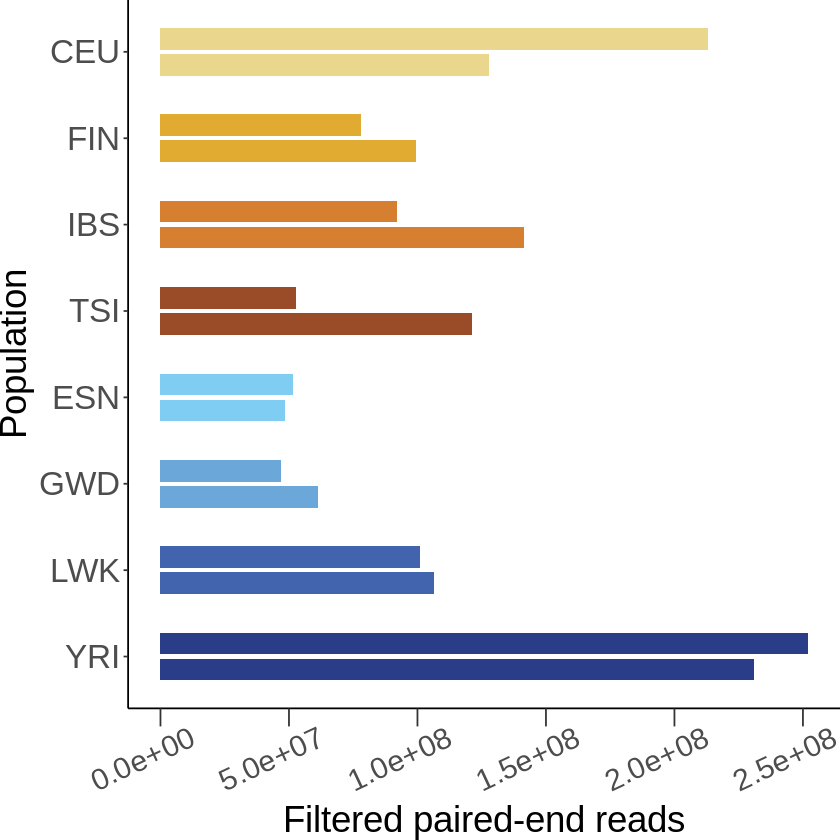

In [41]:
hcc %>% 
    dplyr::filter(map_step=='final') %>% 
    mutate(population = as_factor(population),
           population = fct_relevel(population, popco$population),
           replicate = as_factor(replicate),
           replicate = fct_relevel(replicate, c('rep2','rep1'))) %>%  
    ggplot(aes(x=population,
               y=PE_reads,
               alpha=replicate,
               fill=population)) +
    geom_bar(stat="identity",
             width=0.5,
             position=position_dodge(0.6),
             show.legend=FALSE) + 
    scale_fill_manual(values=popco$hex) + 
    scale_color_manual(values=popco$hex) + 
    scale_alpha_manual(values=c(1,1)) + 
    coord_flip() +  
    labs(
        y = "Filtered paired-end reads", 
        x = "Population") + 
    theme_classic() + 
    theme(axis.text.x = element_text(size=18, angle=25,vjust=.8, hjust=.7),
          axis.text.y = element_text(size=20),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_text(size=22),
          axis.title.y = element_text(size=22),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(0,0,0,0),"line"))

## valid pairs

In [43]:
psdir <- '/home/kpettie/nf_selection/hichip/mapping/hicpro/reps_valid_pairs_filtered/results/hicpro/valid_pairs/stats'
pspattern <- '_allValidPairs.mergestat'
list.files(psdir, pattern=pspattern)

[1] "ASW_rep1_allValidPairs.mergestat" "ASW_rep2_allValidPairs.mergestat"
 [3] "CEU_rep1_allValidPairs.mergestat" "CEU_rep2_allValidPairs.mergestat"
 [5] "CHB_rep1_allValidPairs.mergestat" "CHB_rep2_allValidPairs.mergestat"
 [7] "ESN_rep1_allValidPairs.mergestat" "ESN_rep2_allValidPairs.mergestat"
 [9] "FIN_rep1_allValidPairs.mergestat" "FIN_rep2_allValidPairs.mergestat"
[11] "GWD_rep1_allValidPairs.mergestat" "GWD_rep2_allValidPairs.mergestat"
[13] "IBS_rep1_allValidPairs.mergestat" "IBS_rep2_allValidPairs.mergestat"
[15] "LWK_rep1_allValidPairs.mergestat" "LWK_rep2_allValidPairs.mergestat"
[17] "TSI_rep1_allValidPairs.mergestat" "TSI_rep2_allValidPairs.mergestat"
[19] "YRI_rep1_allValidPairs.mergestat" "YRI_rep2_allValidPairs.mergestat"

In [48]:
tcps <- read_tsv(file.path(psdir, 'ESN_rep2_allValidPairs.mergestat'),
                 col_names=c('pair_type','valid_pairs'))
tcps

Rows: 6 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pair_type
dbl (1): valid_pairs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pair_type,valid_pairs
<chr>,<dbl>
valid_interaction,39603224
valid_interaction_rmdup,16654915
trans_interaction,3317834
cis_interaction,13337081
cis_shortRange,3913665
cis_longRange,9423416


In [53]:
concatPairsStats <- function(psdir, pspattern='_allValidPairs.mergestat') {
    psfs <- list.files(psdir, pattern=pspattern)
    aps <- tibble()
    for (psf in psfs) {
        
        fparse <- str_split(psf, '_', simplify=TRUE)
        cpop <- fparse[,1]
        crep <- fparse[,2]
        csamp <- paste(cpop, crep, sep='_')
        
        cps <- read_tsv(file.path(psdir, psf),
                        col_names=c('pair_type','valid_pairs')) %>% 
            mutate(population=cpop,
                   replicate=crep,
                   sample=csamp)
        
        aps <- rbind(aps, cps)
    }
    
    return(aps)
}

hcp <- concatPairsStats(psdir) %>% 
    filter(population %in% pops)
hcp

Rows: 6 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pair_type
dbl (1): valid_pairs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pair_type
dbl (1): valid_pairs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pair_type
dbl (1): valid_pairs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 2
── Column specification ────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pair_type,valid_pairs,population,replicate,sample
<chr>,<dbl>,<chr>,<chr>,<chr>
valid_interaction,165439611,CEU,rep1,CEU_rep1
valid_interaction_rmdup,77723434,CEU,rep1,CEU_rep1
trans_interaction,14975323,CEU,rep1,CEU_rep1
cis_interaction,62748111,CEU,rep1,CEU_rep1
cis_shortRange,19589348,CEU,rep1,CEU_rep1
cis_longRange,43158763,CEU,rep1,CEU_rep1
valid_interaction,105915061,CEU,rep2,CEU_rep2
valid_interaction_rmdup,27934141,CEU,rep2,CEU_rep2
trans_interaction,4972961,CEU,rep2,CEU_rep2


In [52]:
head(hcc)

population,sample,replicate,map_step,PE_reads
<chr>,<chr>,<chr>,<chr>,<dbl>
CEU,CEU_rep1,rep1,final,213140570
CEU,CEU_rep1,rep1,initial,258226440
CEU,CEU_rep1,rep1,kept_var,13800196
CEU,CEU_rep1,rep1,no_var,199340374
CEU,CEU_rep1,rep1,var,53394816
CEU,CEU_rep2,rep2,final,127905692


In [65]:
hccvp <- merge(
    hcc %>% 
        filter(map_step=='final') %>% 
        select(-map_step),
    hcp %>% 
        filter(pair_type=='cis_interaction') %>% 
        select(-pair_type)
) %>% 
    mutate(perc_valid_pairs = 100*(valid_pairs/PE_reads))
hccvp

population,sample,replicate,PE_reads,valid_pairs,perc_valid_pairs
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
CEU,CEU_rep1,rep1,213140570,62748111,29.43978
CEU,CEU_rep2,rep2,127905692,22961180,17.95165
ESN,ESN_rep1,rep1,51462575,10721927,20.83442
ESN,ESN_rep2,rep2,48442729,13337081,27.53165
FIN,FIN_rep1,rep1,78002936,8197036,10.50862
FIN,FIN_rep2,rep2,99531688,23773157,23.88501
GWD,GWD_rep1,rep1,46981927,15505536,33.00319
GWD,GWD_rep2,rep2,61170111,15519873,25.37166
IBS,IBS_rep1,rep1,91975137,24285623,26.40455


In [114]:
hccvp %>% pull(valid_pairs) %>% sum()

[1] 539996969

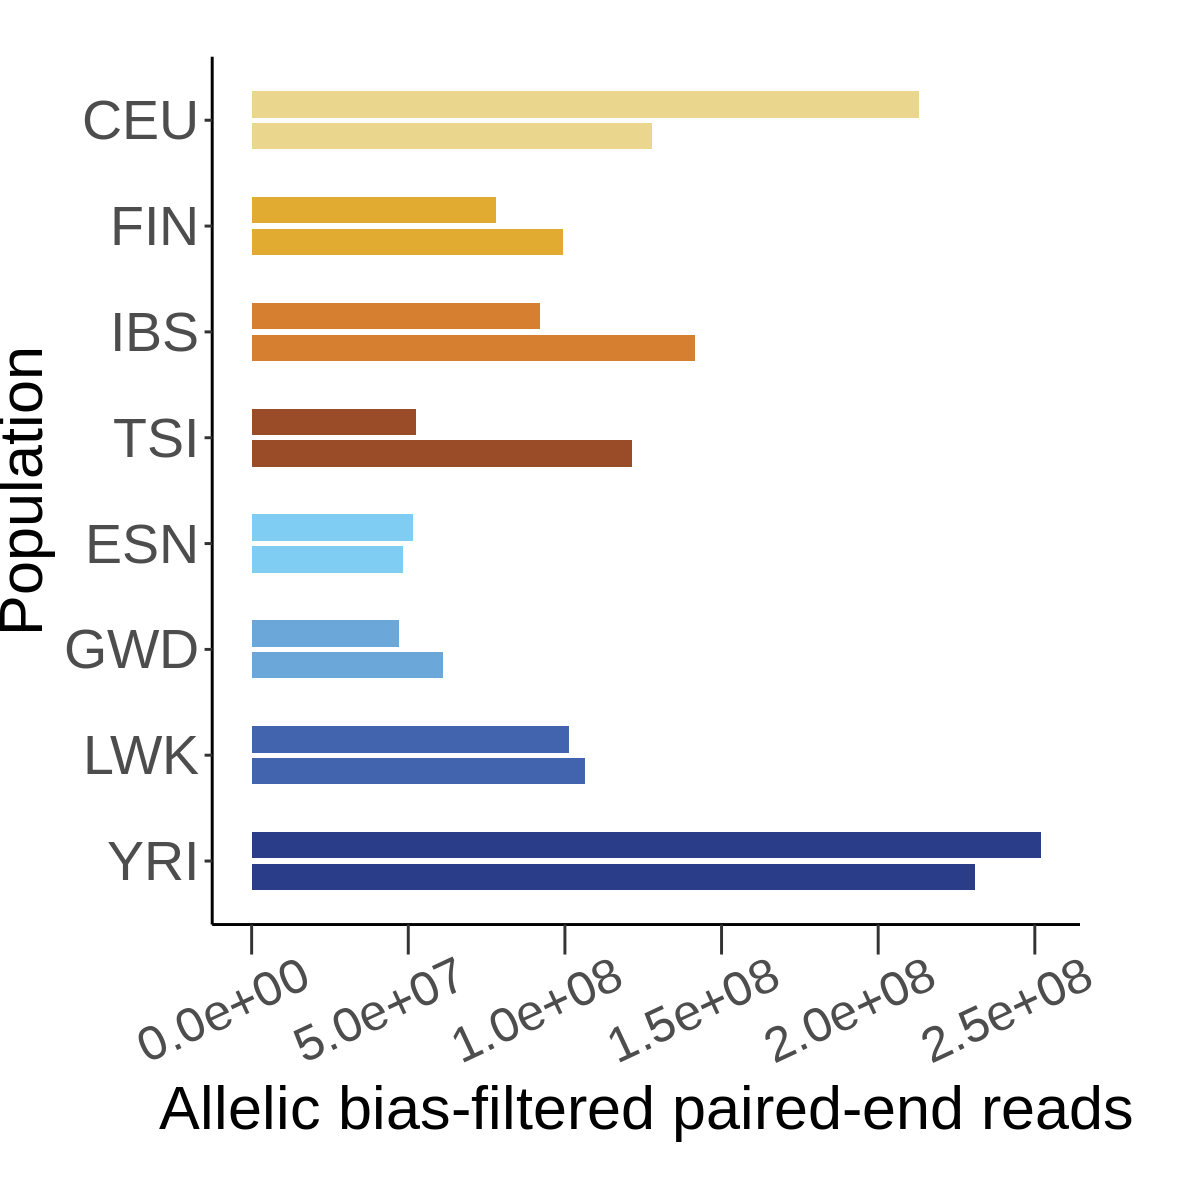

In [109]:
rdim <- c(6,6)
midmargin <- 3
rightmargin <- 1
options(repr.plot.width = rdim[1], repr.plot.height = rdim[2], repr.plot.res = 200)

p1 <- hccvp %>% 
    mutate(population = as_factor(population),
           population = fct_relevel(population, popco$population),
           replicate = as_factor(replicate),
           replicate = fct_relevel(replicate, c('rep2','rep1'))) %>%  
    ggplot(aes(x=population,
               y=PE_reads,
               alpha=replicate,
               fill=population)) +
    geom_bar(stat="identity",
             width=0.5,
             position=position_dodge(0.6),
             show.legend=FALSE) + 
    scale_fill_manual(values=popco$hex) + 
    scale_color_manual(values=popco$hex) + 
    scale_alpha_manual(values=c(1,1)) + 
    coord_flip() +  
    labs(
        y = "Allelic bias-filtered paired-end reads", 
        x = "Population") + 
    theme_classic() + 
    theme(axis.text.x = element_text(size=18, angle=25,vjust=.8, hjust=.7),
          axis.text.y = element_text(size=20),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_text(size=22),
          axis.title.y = element_text(size=22),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(0,midmargin,0,0),"line"),
          aspect.ratio=1)

p1

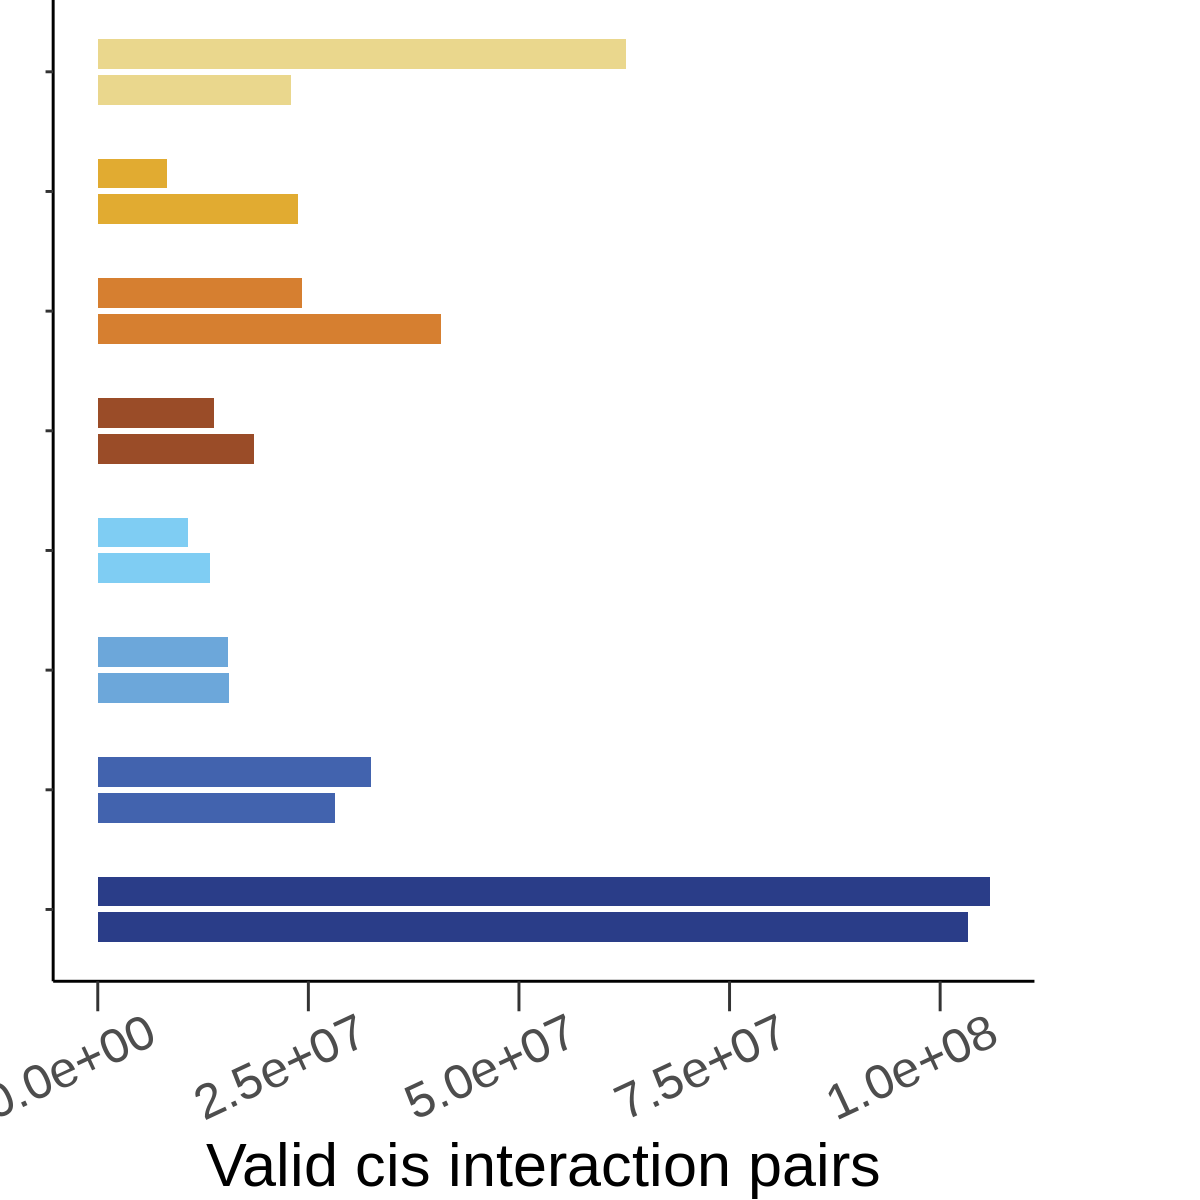

In [110]:
options(repr.plot.width = rdim[1], repr.plot.height = rdim[2], repr.plot.res = 200)

p2 <- hccvp %>% 
    mutate(population = as_factor(population),
           population = fct_relevel(population, popco$population),
           replicate = as_factor(replicate),
           replicate = fct_relevel(replicate, c('rep2','rep1'))) %>%  
    ggplot(aes(x=population,
               y=valid_pairs,
               alpha=replicate,
               fill=population)) +
    geom_bar(stat="identity",
             width=0.5,
             position=position_dodge(0.6),
             show.legend=FALSE) + 
    scale_fill_manual(values=popco$hex) + 
    scale_color_manual(values=popco$hex) + 
    scale_alpha_manual(values=c(1,1)) + 
    coord_flip() +  
    labs(
        y = "Valid cis interaction pairs") + 
    theme_classic() + 
    theme(axis.text.x = element_text(size=18, angle=25,vjust=.8, hjust=.7),
          axis.text.y = element_blank(),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_text(size=22),
          axis.title.y = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(0,midmargin,0,0),"line"),
          aspect.ratio=1)

p2

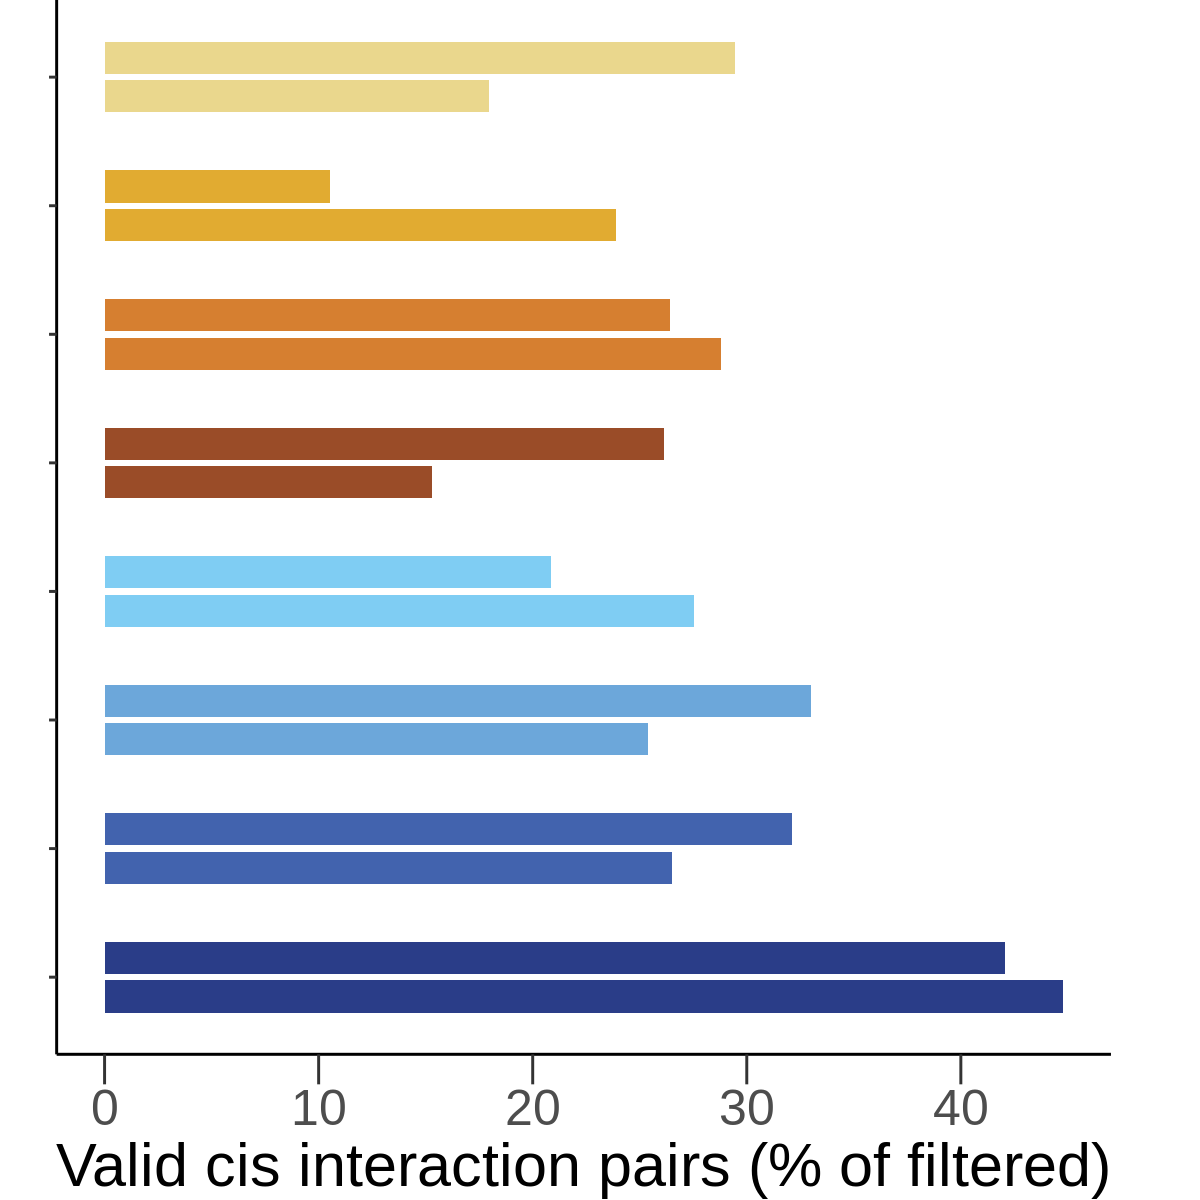

In [111]:
options(repr.plot.width = rdim[1], repr.plot.height = rdim[2], repr.plot.res = 200)

p3 <- hccvp %>% 
    mutate(population = as_factor(population),
           population = fct_relevel(population, popco$population),
           replicate = as_factor(replicate),
           replicate = fct_relevel(replicate, c('rep2','rep1'))) %>%  
    ggplot(aes(x=population,
               y=perc_valid_pairs,
               alpha=replicate,
               fill=population)) +
    geom_bar(stat="identity",
             width=0.5,
             position=position_dodge(0.6),
             show.legend=FALSE) + 
    scale_fill_manual(values=popco$hex) + 
    scale_color_manual(values=popco$hex) + 
    scale_alpha_manual(values=c(1,1)) + 
    coord_flip() +  
    labs(y = "Valid cis interaction pairs (% of filtered)") + 
    theme_classic() + 
    theme(axis.text.x = element_text(size=18),
          axis.text.y = element_blank(),
          axis.ticks.length.x = unit(0.75, "line"),
          axis.title.x = element_text(size=22),
          axis.title.y = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          plot.margin = unit(c(0,rightmargin,0,0),"line"),
          aspect.ratio=1)

p3

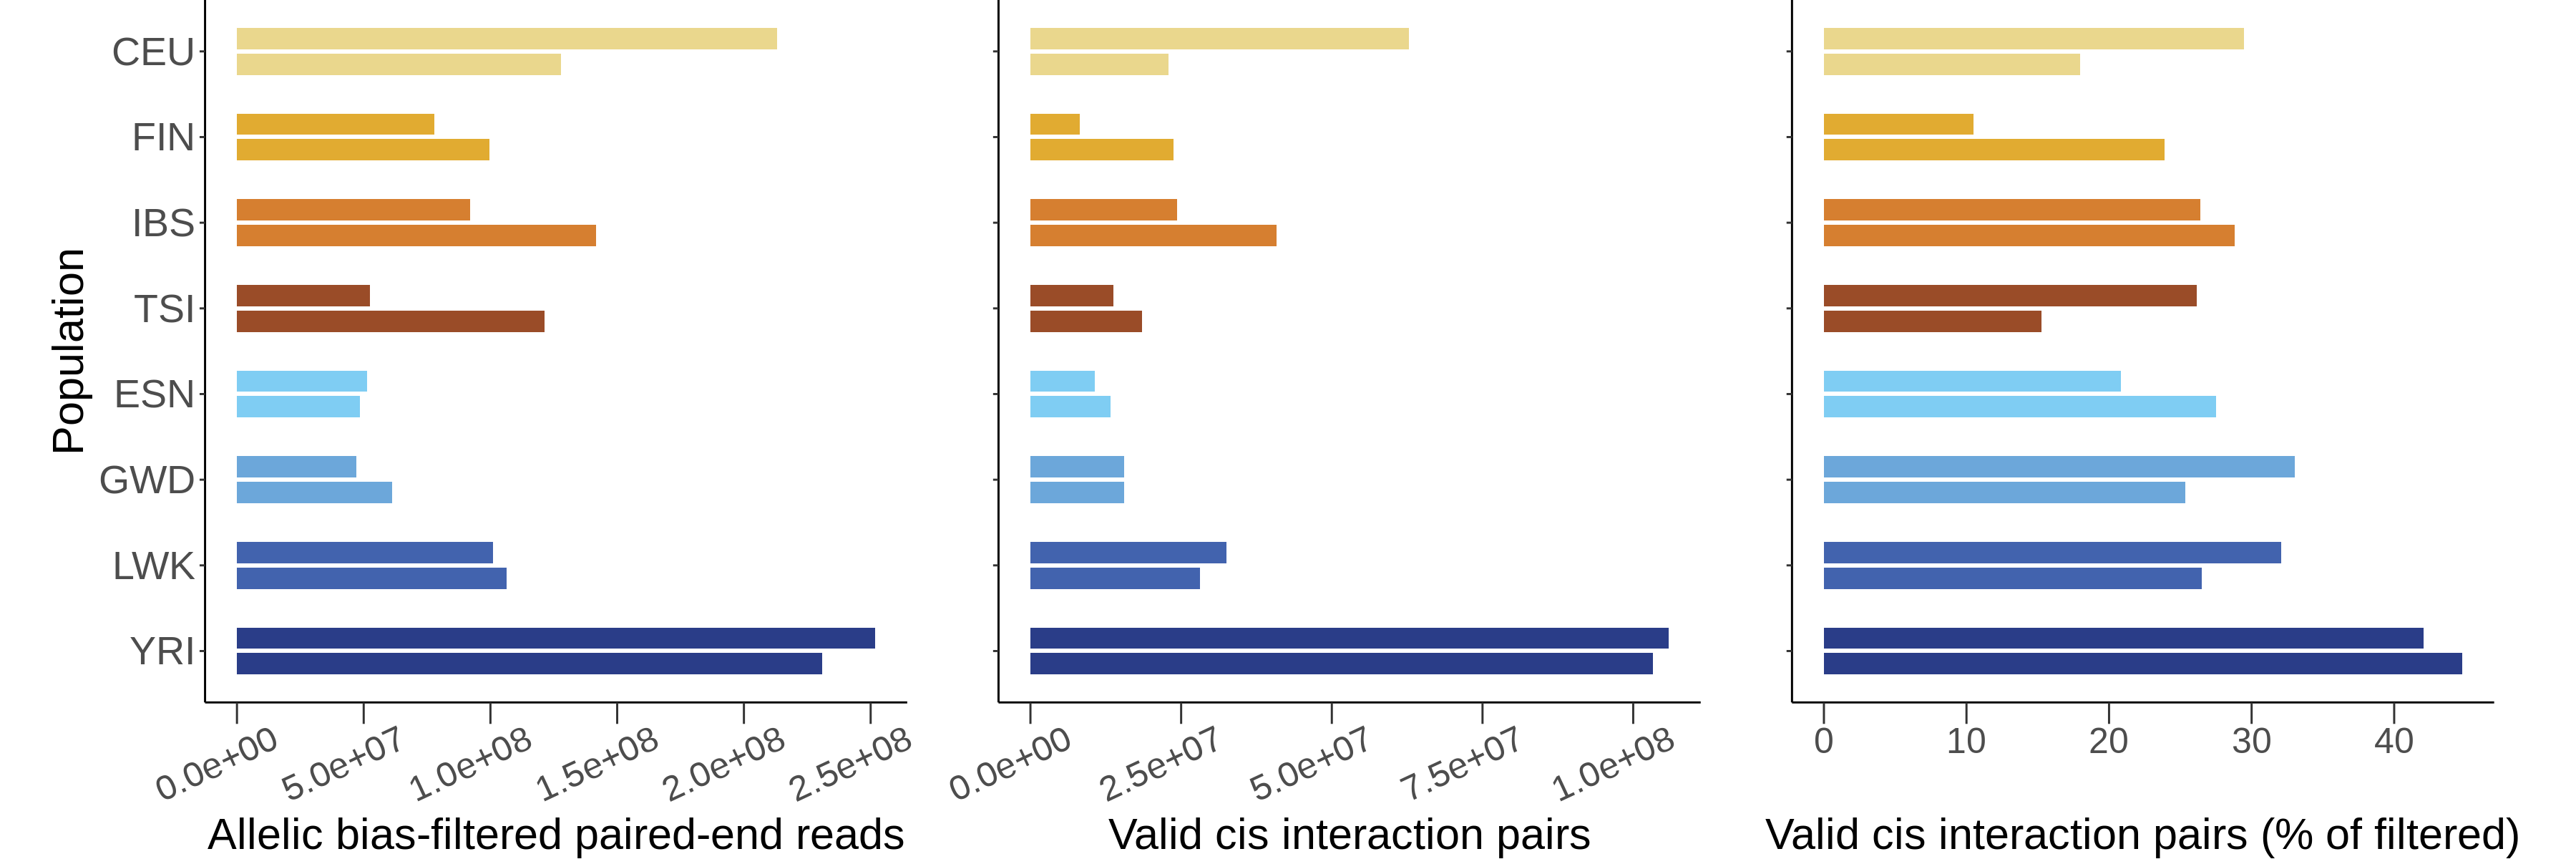

In [113]:

options(repr.plot.width = rdim[1]*3, repr.plot.height = rdim[2], repr.plot.res = 200)

# + theme(plot.margin = unit(c(0,3,0,0),"line"))

# ,
#   top = grid::textGrob(
#        gtitle,
#        gp = grid::gpar(fontsize = 26)
#   ),
#   padding = unit(3, "line")

g1 <- ggplotGrob(p1)
g2 <- ggplotGrob(p2)
g3 <- ggplotGrob(p3)

g <- cbind(g1,g2,g3, size='first')
g$heights <- grid::unit.pmax(g1$heights, g2$heights, g3$heights)

grid::grid.draw(g)

ggsave(
    file.path(
        outdir, 
        'FigS1a.png'
    ), 
    plot=g, 
    width=rdim[1]*3, 
    height=rdim[2]
)